In [76]:
import numpy as np
import matplotlib.pyplot as plt


## Generate the deformed grid

/tmp/ipykernel_397564/1725540940.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axes[1].pcolormesh( DeformedGridX , DeformedGridY, GridColor , cmap='gist_earth' )


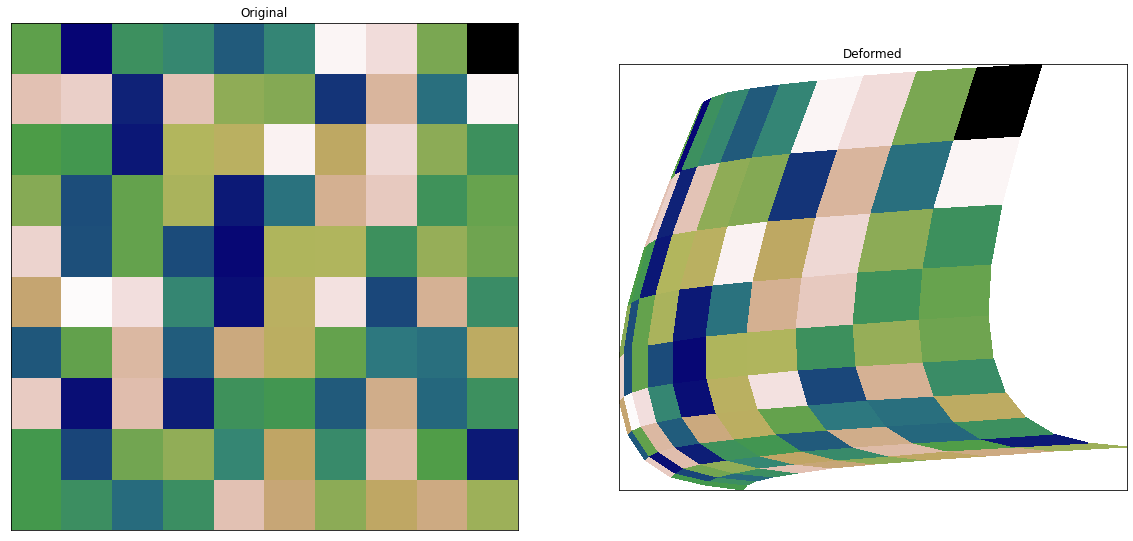

In [77]:
GridSize = 10

GridY, GridX = np.mgrid[ :GridSize , :GridSize ]
GridColor = np.random.random( GridX.shape )

DeformedGridX, DeformedGridY = GridX**2 * np.cos(GridY/20) + (GridY-5)**2, GridY**2 + GridX

fig, axes = plt.subplots(ncols=2,figsize=(20,20))

axes[0].pcolormesh( GridX , GridY, GridColor , cmap='gist_earth' )
axes[1].pcolormesh( DeformedGridX , DeformedGridY, GridColor , cmap='gist_earth' )

axes[0].set_aspect(1)
axes[1].set_aspect(1)

axes[0].set(title='Original', xticks=[], yticks=[])
axes[1].set(title='Deformed', xticks=[], yticks=[])

plt.show()

## Particle $\rightarrow$ Grid

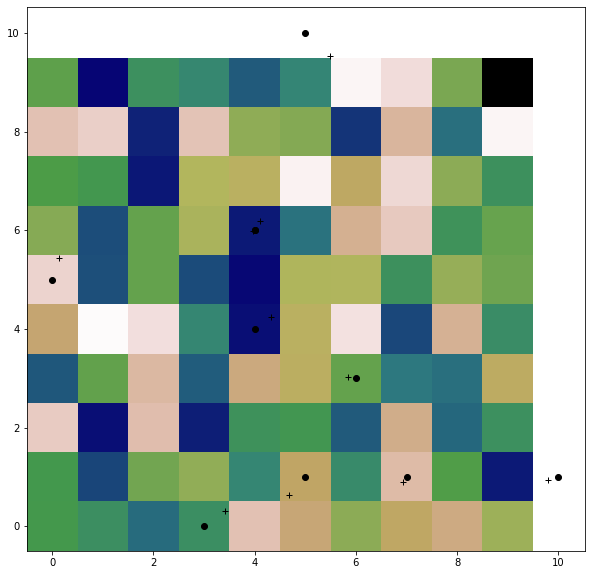

In [78]:
NumberParticles = 10

ParticleX = GridSize * np.random.rand( NumberParticles )
ParticleY = GridSize * np.random.rand( NumberParticles )

Particle2GridX = np.round( ParticleX )
Particle2GridY = np.round( ParticleY )

fig = plt.figure(figsize=(10,10))
plt.pcolormesh( GridX , GridY, GridColor , cmap='gist_earth' )
plt.plot( ParticleX , ParticleY , '+k' )
plt.plot( Particle2GridX , Particle2GridY , 'ok' )
plt.show()

# Question:
## Particle $\rightarrow$ Deformed Grid
## How to find this map?

/tmp/ipykernel_397564/2213863908.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh( DeformedGridX , DeformedGridY, GridColor , cmap='gist_earth' )


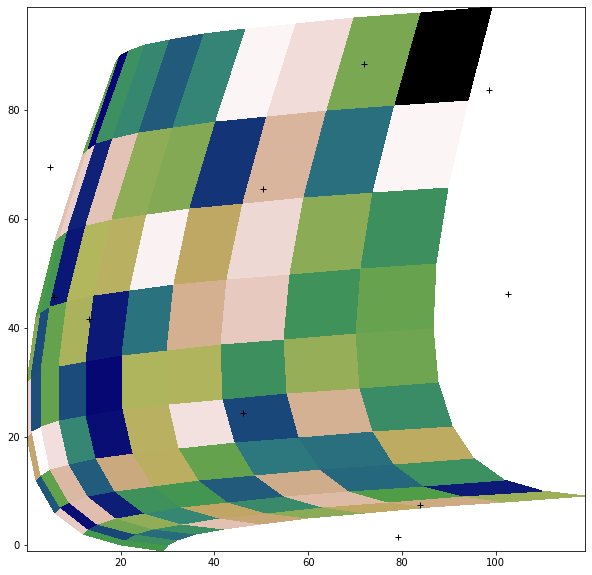

In [79]:
Xmin = np.min( DeformedGridX )
Xmax = np.max( DeformedGridX )

Ymin = np.min( DeformedGridY )
Ymax = np.max( DeformedGridY )

ParticleX = Xmin + (Xmax-Xmin) * np.random.rand( NumberParticles )
ParticleY = Ymin + (Ymax-Ymin) * np.random.rand( NumberParticles )

fig = plt.figure(figsize=(10,10))
plt.pcolormesh( DeformedGridX , DeformedGridY, GridColor , cmap='gist_earth' )
plt.plot( ParticleX , ParticleY , '+k' )
plt.show()

## GTC-X grid

![png](GTC-X_Grid.png)

## Use a neural network:
### Training data:  $( DeformedGridX , DeformedGridY ) \rightarrow ( GridX , GridY )$

### Organize data

In [80]:
NumberData = GridSize * GridSize

Input = np.zeros( [2,NumberData] )
Target = np.zeros( [2,NumberData] )

Input[0,:] = DeformedGridX.flatten()
Input[1,:] = DeformedGridY.flatten()

Target[0,:] = GridX.flatten()
Target[1,:] = GridY.flatten()

## Initializing the 2 layer neural network

![png](Neural_Net.png)

In [81]:
NumberNodes = 10

W1 = 0.5 - np.random.rand( NumberNodes , 2 )
W2 = 0.5 - np.random.rand( 2 , NumberNodes )

B1 = 0.5 - np.random.rand( NumberNodes , 1 )
B2 = 0.5 - np.random.rand( 2 , 1 )

In [82]:
I = np.random.rand(2,1)

FirstLayerOutput = np.tanh( np.matmul( W1 , I ) + B1 )
Output = np.matmul( W2 , FirstLayerOutput ) + B2

## Training:

### Normalize data

In [83]:
InputMin = np.min( Input )
InputMax = np.max( Input )

OutputMin = np.min( Target )
OutputMax = np.max( Target )

Input = (Input - InputMin) / (InputMax - InputMin)
Target = (Target - OutputMin) / (OutputMax - OutputMin)

In [84]:
NumberEpochs = 00
LearningRate = 0.01

FirstLayerOutput = np.zeros( [NumberNodes,1] )
Output = np.zeros( [2,1] )

I = np.zeros( [2,1] )
O = np.zeros( [2,1] )
T = np.zeros( [2,1] )
OO = np.zeros( [NumberNodes,1] )

dB1 = np.zeros( [NumberNodes,1] )
dB2 = np.zeros( [2,1] )

### Error backpropagation algorithm for training:

Input : $\underline{\mathbf{X}} = \begin{bmatrix} x \\ y \end{bmatrix}$ \
Target (expected) output : $\underline{\mathbf{T}} = \begin{bmatrix} \tilde{x} \\ \tilde{y} \end{bmatrix}$ 

    Input layer  : 2 Nodes   
    Hidden Layer : 10 Nodes  
    Output Layer : 2 Nodes
***
### Training:

$\underline{\mathbf{O}} := \underline{\underline{\mathbf{W2}}} \; \tanh( \underline{\underline{\mathbf{W1}}} \; \underline{\mathbf{X}} + \underline{\mathbf{B1}} ) + \underline{\mathbf{B2}}$

$ O_i = \sum_j \left\{ W2_{ij} \; \tanh( \; \sum_k [W1_{jk} \; X_k ] + B1_j \; ) \right\} + B2_i $

***

$\underline{\mathbf{X}} : \; 2 \times 1 \;\;\;\; \underline{\underline{\mathbf{W1}}} : \; 10 \times 2 \;\;\;\; \underline{\mathbf{B1}} : \; 10 \times 1$
$\underline{\mathbf{O}} : \; 2 \times 1 \;\;\;\; \underline{\underline{\mathbf{W2}}} : \; 2 \times 10 \;\;\;\; \underline{\mathbf{B2}} : \; 2 \times 1$ 


$ E = Error \; = \; (\underline{\mathbf{O}}-\underline{\mathbf{T}})^2 \; = \; (\underline{\mathbf{O}}-\underline{\mathbf{T}}) . (\underline{\mathbf{O}}-\underline{\mathbf{T}}) $
$ \; = \; \sum_i (O_i-T_i)^2$

### Updation:

$\underline{\underline{\mathbf{W1}}} \;\; \rightarrow \;\; \underline{\underline{\mathbf{W1}}} - \eta \;\; \partial E / \partial \underline{\underline{\mathbf{W1}}}$

$\underline{\underline{\mathbf{W2}}} \;\; \rightarrow \;\; \underline{\underline{\mathbf{W2}}} - \eta \;\; \partial E / \partial \underline{\underline{\mathbf{W2}}}$

$\underline{\mathbf{B1}} \;\; \rightarrow \;\; \underline{\mathbf{B1}} - \eta \;\; \partial E / \partial \underline{\mathbf{B1}}$

$\underline{\mathbf{B2}} \;\; \rightarrow \;\; \underline{\mathbf{B2}} - \eta \;\; \partial E / \partial \underline{\mathbf{B2}}$

---

$ \partial E / \partial \underline{\mathbf{B2}} = 2  \; (\underline{\mathbf{O}} - \underline{\mathbf{T}}) $

$ \partial E / \partial \underline{\underline{\mathbf{W2}}} = \partial E / \partial \underline{\mathbf{B2}} \;.\; \tanh( \; \underline{\underline{\mathbf{W1}}} \; \underline{\mathbf{X}} + \underline{\mathbf{B1}} \; )^T $

$ \partial E / \partial \underline{\mathbf{B1}} = 2  \; sech( \; \underline{\underline{\mathbf{W1}}} \; \underline{\mathbf{X}} + \underline{\mathbf{B1}} \; )^2 \;\odot\;  \left[ \underline{\underline{W2}}^T \; . \; (\underline{\mathbf{O}} - \underline{\mathbf{T}}) \right] $

$ \partial E / \partial \underline{\underline{\mathbf{W1}}} = \partial E / \partial \underline{\mathbf{B1}} \;.\; \underline{\mathbf{X}}^T $

where $\odot$ is the element-wise product.

## Detailed calculations:

---

$\partial E / \partial B2_\alpha \; = \; \sum_i \; 2 \; (O_i - T_i) \; \partial B2_i / \partial B2_\alpha \; = \; \sum_i \; 2 \; (O_i - T_i) \; \delta_{i\alpha} $

$ \;\;\;\; = \;2 \; (O_\alpha - T_\alpha) $

\\

$ \; \Rightarrow \;\; \partial E / \partial \underline{\mathbf{B2}} = 2  \; (\underline{\mathbf{O}} - \underline{\mathbf{T}}) $

---

$\partial E / \partial W2_{\alpha \beta} \; = \; \sum_i \; 2 \; (O_i-T_i) \; (\sum_j \; \partial W2_{ij} / \partial W2_{\alpha \beta} \; \tanh( \sum_k \; W1_{jk} \; X_k + B1_j) ) $

$ \;\;\;\; = \; \sum_i \; 2 \; (O_i-T_i) \; (\sum_j \; \delta_{i\alpha} \; \delta_{j\beta} \; \tanh( \sum_k \; W1_{jk} \; X_k + B1_j) ) $

$ \;\;\;\; = \; 2 \; (O_\alpha-T_\alpha) \; (\; \tanh( \sum_k \; W1_{\beta k} \; X_k + B1_\beta) )$

\\

$ \; \Rightarrow \;\; \partial E / \partial \underline{\underline{\mathbf{W2}}} = \partial E / \partial \underline{\mathbf{B2}} \;.\; \tanh( \; \underline{\underline{\mathbf{W1}}} \; \underline{\mathbf{X}} + \underline{\mathbf{B1}} \; )^T $

---

$\partial E / \partial B1_\alpha \; = \; \sum_i \; 2 \; (O_i-T_i) \; (\sum_j \; W2_{ij} \; sech( \sum_k W1_{jk} \; X_k + B1_j )^2  \; \partial B1_j / \partial B1_\alpha)
\; = \; \sum_i \; 2 \; (O_i-T_i) \; (\sum_j \; W2_{ij} \; sech( \sum_k W1_{jk} \; X_k + B1_j )^2  \; \delta_{j\alpha} )$

$ \;\;\;\; = \; \sum_i \; 2 \; (O_i-T_i) \; (W2_{i\alpha} \; sech( \sum_k W1_{\alpha k} \; X_k + B1_\alpha )^2 )$

$ \;\;\;\; = \; 2 \; ( sech( \sum_k W1_{\alpha k} \; X_k + B1_\alpha )^2 ) \; (\sum_i \; (O_i-T_i) \; W2_{i\alpha} ) $

\\

$ \; \Rightarrow \;\; \partial E / \partial \underline{\mathbf{B1}} = 2  \; sech( \; \underline{\underline{\mathbf{W1}}} \; \underline{\mathbf{X}} + \underline{\mathbf{B1}} \; )^2 \;\odot\;  \left[ \underline{\underline{W2}}^T \; . \; (\underline{\mathbf{O}} - \underline{\mathbf{T}}) \right] $

---

$\partial E / \partial W1_{\alpha\beta} \; = \; \sum_i \; 2 \; (O_i-T_i) \; \left\{ \sum_j \; W2_{ij} \; sech( \sum_k W1_{jk} \; X_k + B1_j )^2 \; \left[ \sum_l \; (\partial W1_{jl} / \partial W1_{\alpha\beta}) \; X_l \right] \right\} $

$ \;\;\;\; = \sum_i \; 2 \; (O_i-T_i) \; \left\{ W2_{i\alpha} \; sech( \sum_k W1_{\alpha k} \; X_k + B1_\alpha )^2 \; X_\beta \right\} $

$ \;\;\;\; = \; 2 \; sech( \sum_k W1_{\alpha k} \; X_k + B1_\alpha )^2  \; \left\{ \sum_i \; (O_i-T_i) \; W2_{i\alpha} \right\} \; X_\beta $

\\

$ \; \Rightarrow \;\; \partial E / \partial \underline{\underline{\mathbf{W1}}} = \partial E / \partial \underline{\mathbf{B1}} \;.\; \underline{\mathbf{X}}^T $

---

# Main training loop

In [85]:
for Epoch in range( NumberEpochs ):

    for Data in range( NumberData ):
        RandomIndex = int( np.floor( np.random.rand(1) * NumberData ) )

        I[:,0] = Input[:,RandomIndex]
        T[:,0] = Target[:,RandomIndex]

        LinOutput = np.matmul( W1 , I ) + B1
        FirstLayerOutput = np.tanh( LinOutput )
        Output = np.matmul( W2 , FirstLayerOutput ) + B2

        dB2 = 2 * ( Output - T )
        dB1 = 2 * (1/np.cosh( np.matmul(W1,I) + B1 ))**2 * ( np.matmul( np.transpose(W2), (Output-T) ) )

        dW2 = np.matmul( dB2 , np.transpose( FirstLayerOutput ) )
        dW1 = np.matmul( dB1 , np.transpose(I) )
        
        W1 = W1 - LearningRate * dW1
        W2 = W2 - LearningRate * dW2
        B1 = B1 - LearningRate * dB1
        B2 = B2 - LearningRate * dB2

## Predicting the output

In [86]:
FirstLayerOutput = np.tanh( np.matmul( W1 , Input ) + B1 )
Output = np.matmul( W2 , FirstLayerOutput ) + B2

In [87]:
Target = Target * (OutputMax-OutputMin) + OutputMin
Output = Output * (OutputMax-OutputMin) + OutputMin

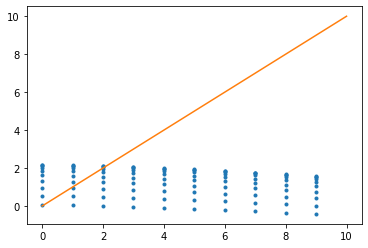

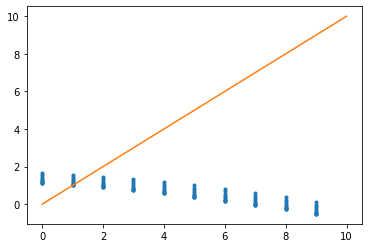

In [88]:
plt.plot( Target[0,:] , Output[0,:] , '.' )
plt.plot( [0 , GridSize] , [0 , GridSize] ,'-' )
plt.show()

plt.plot( Target[1,:] , Output[1,:] , '.' )
plt.plot( [0 , GridSize] , [0 , GridSize] ,'-' )
plt.show()